# Root finding methods

These are a collection of methods used to find the points where 1D functions are zero.


#### Reference:

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter19.00-Root-Finding.html


## Example:

Find the roots of:

$f(x) = x^2 -1$

Obviously they are:

$x = \pm 1$

In [59]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

## 1. Using scipy.optimize()

In [60]:
# Create x axis

x = np.arange(-2, 2, 0.01)

In [61]:
# Define function

func = lambda x: x**2 - 1

In [62]:
# Evaluate function

y = func(x)

In [63]:
# Check shape

print(x.shape, y.shape)

(400,) (400,)


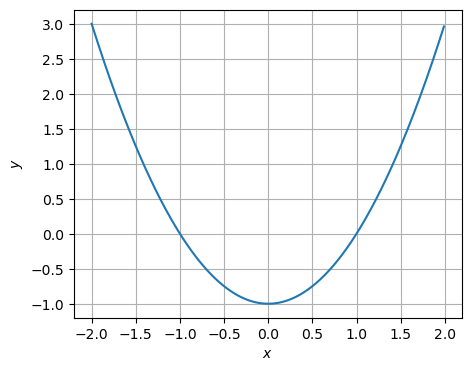

In [64]:
plt.figure(figsize=(5,4))

plt.plot(x, y)

plt.grid()

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()

In [67]:
# Call root finder

roots_func = opt.fsolve(func, [-2, 1.5])

In [68]:
print(roots_func)

[-1.  1.]


## 2. Imaginary roots using numpy.roots()


## Example:

Find the roots of:

$f(x) = x^2 +1$

$x = \pm i$

In [69]:
func2 = lambda x: x**2 + 1

In [70]:
y2 = func2(x)

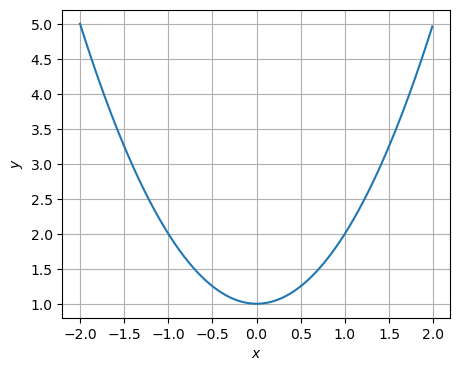

In [71]:
plt.figure(figsize=(5,4))

plt.plot(x, y2)

plt.grid()

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()

In [72]:
roots_func2 = opt.fsolve(func2, [-10, 20])

print(roots_func2)

[0.00702168 0.00364742]


###NOTE

In [77]:
roots_func2 = np.roots([2, 0, +1])

print(roots_func2) #these are not the roots, but the values of the last iteration.

[-0.+0.70710678j  0.-0.70710678j]


## 3. Newton-Rhapson method:

#### Reference:

https://en.wikipedia.org/wiki/Newton%27s_method


$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

In [78]:
func = lambda x: x**2 - 1

func_prime = lambda x: 2*x

In [79]:
x_0 = 2.0

x_1 = x_0 - (func(x_0))/(func_prime(x_0))

In [80]:
print(x_1)

1.25


In [38]:
x_2 = x_1 - (func(x_1))/(func_prime(x_1))

In [81]:
print(x_2)

1.025


In [82]:
x_3 = x_2 - (func(x_2))/(func_prime(x_2))

In [83]:
print(x_3)

1.0003048780487804


#### Function:

In [84]:
def newton_rhapson(func, func_prime, x_0, tolerance):
    
    """
    Function to find roots based on the NR method.
    User should provide a tolerance value at which iteration stops.
    """
    
    if abs(func(x_0)) < tolerance:
        return x_0
    else:
        return newton_rhapson(func, func_prime, x_0 - (func(x_0))/(func_prime(x_0)), tolerance)

In [85]:
x_00 = -10
root_1 = newton_rhapson(func, func_prime, x_0, 1.e-15)
root_2 = newton_rhapson(func, func_prime, x_00, 1.e-15)

In [86]:
print(root_1, root_2)

1.0 -1.0


## 4. Bisection method:

https://en.wikipedia.org/wiki/Bisection_method

In [87]:
# 1. Get mid point
a = 0.
b = 2.5
tolerance = 1.e-7

c = (a + b)/2

# 2. Evaluate function in c
y = func(c)

In [88]:
print(c, y)

1.25 0.5625


In [89]:
b1 = c

c1 = (a + b1)/2

y1 = func(c1)

In [90]:
print(c1, y1)

0.625 -0.609375


In [91]:
a2 = c1
b2 = c

c2 = (a2 + b2)/2
y2 = func(c2)

In [92]:
print(c2, y2)

0.9375 -0.12109375


In [93]:
a3 = c2
b3 = c

c3 = (a3 + b3)/2
y3 = func(c3)

print(c3, y3)

1.09375 0.1962890625


#### Function:

In [94]:
def bisection(func, a, b, tolerance):
    """
    Function to find the roots based on getting points on each side and then the mid point
    The user should indicate the tolerance and then call the function recursively.
    
    """
    c = (a + b)/2
    
    if np.abs(func(c)) < tolerance:
        return c
    
    elif np.sign(func(a)) == np.sign(func(c)):
        return bisection(func, c, b, tolerance)
    
    elif np.sign(func(b)) == np.sign(func(c)):  
        return bisection(func, a, c, tolerance)        

In [95]:
a_0 = 0
b_0 = 2.5

a_00 = -2.2
b_00 = 0.1
tolerance = 1.e-17

root_1 = bisection(func, a_0, b_0, tolerance)
root_2 = bisection(func, a_00, b_00, tolerance)
print(root_1, root_2)

1.0 -1.0
